In [16]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data, cancer.target,random_state=42)
pipe = Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])
param_grid = {'svm__C' : [.001,.01,.1,1,10,100],"svm__gamma":[.001,.01,.1,1,10,100]}  
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [5]:
grid.best_score_

0.9741450068399453

In [6]:
grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=10, gamma=0.1))])

In [7]:
grid.score(x_test,y_test)

0.986013986013986

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

C:\Users\Akdi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [10]:
x_train,x_test,y_train,y_test= train_test_split(boston.data,boston.target,random_state=0)


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),Ridge())

In [25]:
param_grid = {'ridge__alpha': [.001,.01,.1,1,10,100],'polynomialfeatures__degree':[1,2,3]}

In [26]:
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

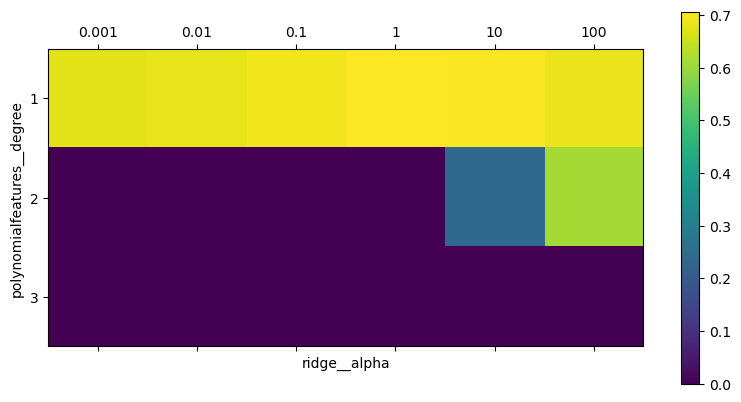

In [29]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0,cmap='viridis')
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid["ridge__alpha"])),param_grid["ridge__alpha"])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid["polynomialfeatures__degree"])
plt.colorbar()

In [30]:
grid.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 1}

In [31]:
grid.best_score_

0.7064660409186194